<a href="https://colab.research.google.com/github/yulishadian/Image-Classification_270-268/blob/main/Image_Classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/kaggle.json"

In [17]:
%cd "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle"

/content/gdrive/MyDrive/Tugas Besar ML/Kaggle


In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


# Preprocessing

In [18]:
!unzip "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers-recognition.zip" -d "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle"

Archive:  /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers-recognition.zip
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10391248763_1d16681106_n.jpg

In [19]:
!ls

flowers  flowers-recognition.zip  kaggle.json


In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import layers,models

In [21]:
mypath= 'flowers/'

In [22]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [23]:
import pandas as pd

# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
daisy         764
dandelion    1052
rose          784
sunflower     733
tulip         984
dtype: int64

In [24]:
#cek sample datanya
df.head()

,path,file_name,tag
0,flowers/daisy/100080576_f52e8ee070_n.jpg,100080576_f52e8ee070_n.jpg,daisy
1,flowers/daisy/10140303196_b88d3d6cec.jpg,10140303196_b88d3d6cec.jpg,daisy
2,flowers/daisy/10172379554_b296050f82_n.jpg,10172379554_b296050f82_n.jpg,daisy
3,flowers/daisy/10172567486_2748826a8b.jpg,10172567486_2748826a8b.jpg,daisy
4,flowers/daisy/10172636503_21bededa75_n.jpg,10172636503_21bededa75_n.jpg,daisy


In [25]:
#load library untuk train test split
from sklearn.model_selection import train_test_split

In [26]:
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']

In [27]:
# split data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=300)

In [28]:
# Pembagian data aet menjadi data test dan data validation
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.19, random_state=100)

In [29]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [30]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 3885
val size 349
test size 83


In [31]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag      
test        daisy         73
            dandelion     89
            rose          69
            sunflower     48
            tulip         70
train       daisy        675
            dandelion    951
            rose         698
            sunflower    668
            tulip        893
validation  daisy         16
            dandelion     12
            rose          17
            sunflower     17
            tulip         21
dtype: int64 




,path,tag,set
1872,flowers/daisy/11023214096_b5b39fab08.jpg,daisy,train
2635,flowers/tulip/14254839301_ffb19c6445_n.jpg,tulip,train
1519,flowers/sunflower/877083343_e3338c4125.jpg,sunflower,train


In [32]:
train_path = os.path.join("/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers")
classes = os.listdir(train_path)

In [33]:
train_gen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

train_data = train_gen.flow_from_directory(
    train_path, 
    target_size=(150, 150),
    batch_size = 64, 
    class_mode = "categorical" ,
    classes  = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
    shuffle = True,
)

Found 4317 images belonging to 5 classes.


(64, 150, 150, 3)


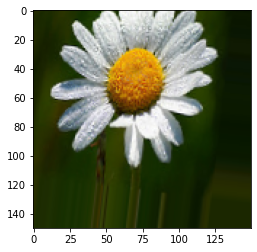

In [34]:
x, y = next(train_data)
print(x.shape)
plt.imshow(x[0])

In [35]:
#Model 1 Yunia

In [36]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, BatchNormalization, Dropout

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [39]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 34, 128)       5

In [41]:
model.compile(loss = "categorical_crossentropy", metrics = "acc", optimizer='adam')
history1 = model.fit(train_data, epochs = 100 )

Epoch 1/100
68/68 [==============================] - 243s 4s/step - loss: 4.6641 - acc: 0.4295
Epoch 2/100
68/68 [==============================] - 254s 4s/step - loss: 1.3032 - acc: 0.5068
Epoch 3/100
68/68 [==============================] - 238s 3s/step - loss: 1.1654 - acc: 0.5388
Epoch 4/100
68/68 [==============================] - 238s 3s/step - loss: 1.0325 - acc: 0.6018
Epoch 5/100
68/68 [==============================] - 236s 3s/step - loss: 0.9904 - acc: 0.6203
Epoch 6/100
68/68 [==============================] - 235s 3s/step - loss: 0.9272 - acc: 0.6342
Epoch 7/100
68/68 [==============================] - 235s 3s/step - loss: 0.8836 - acc: 0.6509
Epoch 8/100
68/68 [==============================] - 236s 3s/step - loss: 0.8449 - acc: 0.6727
Epoch 9/100
68/68 [==============================] - 234s 3s/step - loss: 0.8182 - acc: 0.6857
Epoch 10/100
68/68 [==============================] - 233s 3s/step - loss: 0.8123 - acc: 0.6877
Epoch 11/100
68/68 [=============================

In [43]:
import json

target_dir = '/content/gdrive/MyDrive/Tugas Besar ML/Kaggle'

# simpan history model kedua
history_dict = history1.history
json.dump(history_dict, open(target_dir + '/history_model_1.json', 'w'))

# simpan model pertama dan weight-nya
model.save(target_dir + '/model_1.h5')
model.save_weights(target_dir + '/model_1_weights.h5')

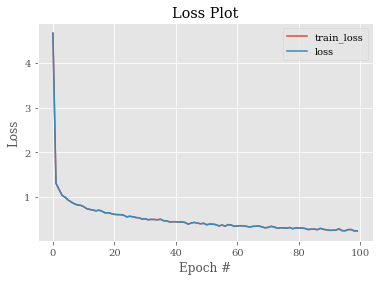

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(history1.history["loss"], label="train_loss")
plt.plot(history1.history["loss"], label="loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

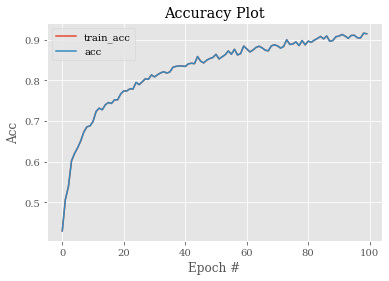

In [62]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history1.history["acc"], label="train_acc")
plt.plot(history1.history["acc"], label="acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(X_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, batch_size)

print("accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("Loss: ",test_score[0])

In [ ]:
#Model 2 Yunia

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, BatchNormalization, Dropout

In [ ]:
# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[150,150,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(Flatten())

In [ ]:
# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model2.summary())

In [ ]:
# Compile model 2
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc2'])

In [ ]:
model2.compile(loss = "categorical_crossentropy", metrics = "acc", optimizer='adam')
history2 = model2.fit(train_data, epochs = 100 )

In [ ]:
history2 = model2.fit(X_train, y_train, batch_size=20, epochs=100, validation_data=(X_val, y_val))

In [ ]:
import json

target_dir = '/content/gdrive/MyDrive/Tugas Besar ML/Kaggle'

# simpan history model kedua
history_dict = history2.history
json.dump(history_dict, open(target_dir + '/history_model_2.json', 'w'))

# simpan model pertama dan weight-nya
model.save(target_dir + '/model_2.h5')
model.save_weights(target_dir + '/model_2_weights.h5')

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), history2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), history2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.Xlabel("Epochs #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), history2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), history2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.Xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
pred2 = model2.predict(X_val)
labels2 = (pred2 > 0.5).astype(np.int)

print(classification_report(y_val, labels2))

In [ ]:
from PIL import Image

img_upload = Image.open("/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/100080576_f52e8ee070_n.jpg")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['drive/MyDrive/MLModule/BatchNormModel.h5','drive/MyDrive/MLModule/DropoutModel.h5']
labels = ['cat', 'dog']

for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:3]
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')